In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv('driver_value.csv')

In [3]:
# Display first few rows of the dataset
print(data.head())

        Driver Name  Bahrain GP  Imola GP  Portugal GP  Spain GP  Monaco GP  \
0    Lewis Hamilton        33.5      33.4         33.4      33.3       33.3   
1    Max Verstappen        24.8      25.1         25.2      25.3       25.3   
2   Valtteri Bottas        23.6      23.5         23.4      23.2       23.3   
3      Sergio Perez        18.4      18.4         18.3      18.3       18.2   
4  Daniel Ricciardo        17.3      16.7         16.6      16.4       16.2   

   Azerbaijan GP  French GP  Styrian GP  Austrian GP  ...  Dutch GP  \
0           33.3       33.2        33.1         33.1  ...      33.0   
1           25.4       25.5        25.5         25.6  ...      25.7   
2           23.1       23.0        23.0         23.0  ...      23.0   
3           18.0       18.3        18.5         18.8  ...      18.5   
4           16.2       16.0        15.9         15.9  ...      15.7   

   Italian GP  Russian GP  Turkish GP  USA GP  Mexican GP  Brazilian GP  \
0        33.0        33

# Data Cleaning

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Driver Name         0
Bahrain GP          0
Imola GP            0
Portugal GP         0
Spain GP            0
Monaco GP           0
Azerbaijan GP       0
French GP           0
Styrian GP          0
Austrian GP         0
British GP          0
Hungarian GP        0
Belgian GP          0
Dutch GP            0
Italian GP          0
Russian GP          0
Turkish GP          0
USA GP              0
Mexican GP          0
Brazilian GP        0
Qatar GP            0
Saudi Arabian GP    0
Abu Dhabi GP        0
dtype: int64


# Descriptive Statistics

In [5]:
# Descriptive statistics for the dataset
descriptive_stats = data.describe()
descriptive_stats

,Bahrain GP,Imola GP,Portugal GP,Spain GP,Monaco GP,Azerbaijan GP,French GP,Styrian GP,Austrian GP,British GP,...,Dutch GP,Italian GP,Russian GP,Turkish GP,USA GP,Mexican GP,Brazilian GP,Qatar GP,Saudi Arabian GP,Abu Dhabi GP
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000
mean,13.985000,13.905000,13.890000,13.895000,13.885000,13.870000,13.87500,13.865000,13.860000,13.845000,...,13.855000,13.870000,13.870000,13.865000,13.860000,13.860000,13.860000,13.85500,13.845000,13.84500
std,7.240985,7.247756,7.247715,7.223753,7.231166,7.236901,7.23332,7.212509,7.223237,7.215077,...,7.213181,7.222778,7.216801,7.233204,7.244555,7.237577,7.230447,7.22856,7.230526,7.22856
min,5.500000,5.300000,5.300000,5.300000,5.300000,5.300000,5.30000,5.300000,5.300000,5.300000,...,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.30000,5.300000,5.30000
25%,8.575000,9.000000,9.000000,8.850000,8.550000,8.350000,8.30000,8.300000,8.300000,8.375000,...,8.300000,8.225000,8.225000,8.225000,8.150000,8.150000,8.125000,8.12500,8.125000,8.12500
50%,13.500000,13.500000,13.600000,13.650000,13.700000,13.650000,13.65000,13.600000,13.650000,13.650000,...,13.750000,13.750000,13.750000,13.750000,13.750000,13.750000,13.650000,13.60000,13.550000,13.55000
75%,16.925000,16.875000,16.850000,16.750000,16.650000,16.650000,16.57500,16.400000,16.325000,16.225000,...,16.175000,16.200000,16.200000,16.250000,16.275000,16.250000,16.250000,16.25000,16.175000,16.15000
max,33.500000,33.400000,33.400000,33.300000,33.300000,33.300000,33.20000,33.100000,33.100000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.100000,33.000000,32.900000,32.90000,32.900000,32.90000


# Performance Metrics

In [6]:
# Calculate the average performance for each driver
data['Average Performance'] = data.iloc[:, 1:].mean(axis=1)

# Display the average performance
average_performance = data[['Driver Name', 'Average Performance']]
average_performance

,Driver Name,Average Performance
0,Lewis Hamilton,33.104545
1,Max Verstappen,25.522727
2,Valtteri Bottas,23.195455
3,Sergio Perez,18.445455
4,Daniel Ricciardo,16.004545
5,Charles Leclerc,17.663636
6,Sebastian Vettel,15.200000
7,Fernando Alonso,15.009091
8,Carlos Sainz,14.527273
9,Lance Stroll,13.368182


In [7]:
# Calculate the standard deviation of each driver's performance
data['Performance Std Dev'] = data.iloc[:, 1:-1].std(axis=1)

# Calculate consistency as the inverse of the standard deviation
data['Consistency'] = 1 / data['Performance Std Dev']

# Normalize consistency scores to range from 0 to 1
data['Normalized Consistency'] = (data['Consistency'] - data['Consistency'].min()) / (data['Consistency'].max() - data['Consistency'].min())

# Display consistency scores
consistency_scores = data[['Driver Name', 'Normalized Consistency']]
consistency_scores

,Driver Name,Normalized Consistency
0,Lewis Hamilton,0.115755
1,Max Verstappen,0.063706
2,Valtteri Bottas,0.110105
3,Sergio Perez,0.097210
4,Daniel Ricciardo,0.000000
5,Charles Leclerc,0.033494
6,Sebastian Vettel,0.057749
7,Fernando Alonso,0.108944
8,Carlos Sainz,0.105635
9,Lance Stroll,0.128951


# Visualization

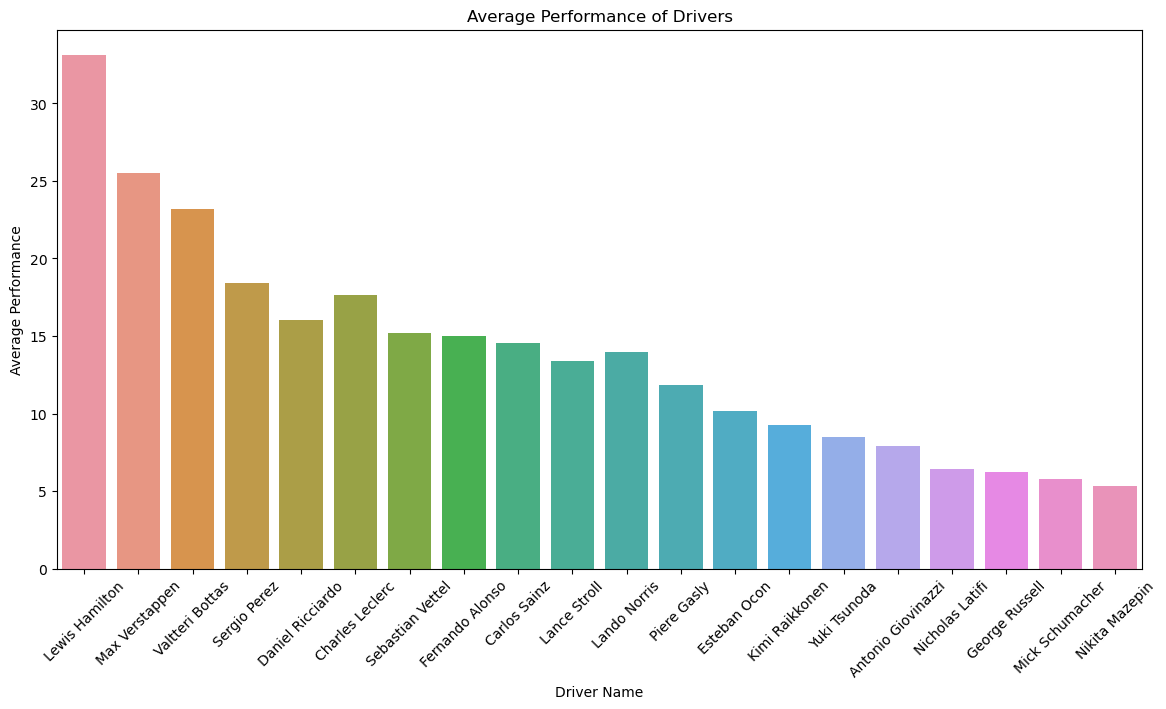

In [8]:
# Plot average performance
plt.figure(figsize=(14, 7))
sns.barplot(x='Driver Name', y='Average Performance', data=data)
plt.title('Average Performance of Drivers')
plt.xlabel('Driver Name')
plt.ylabel('Average Performance')
plt.xticks(rotation=45)
plt.show()

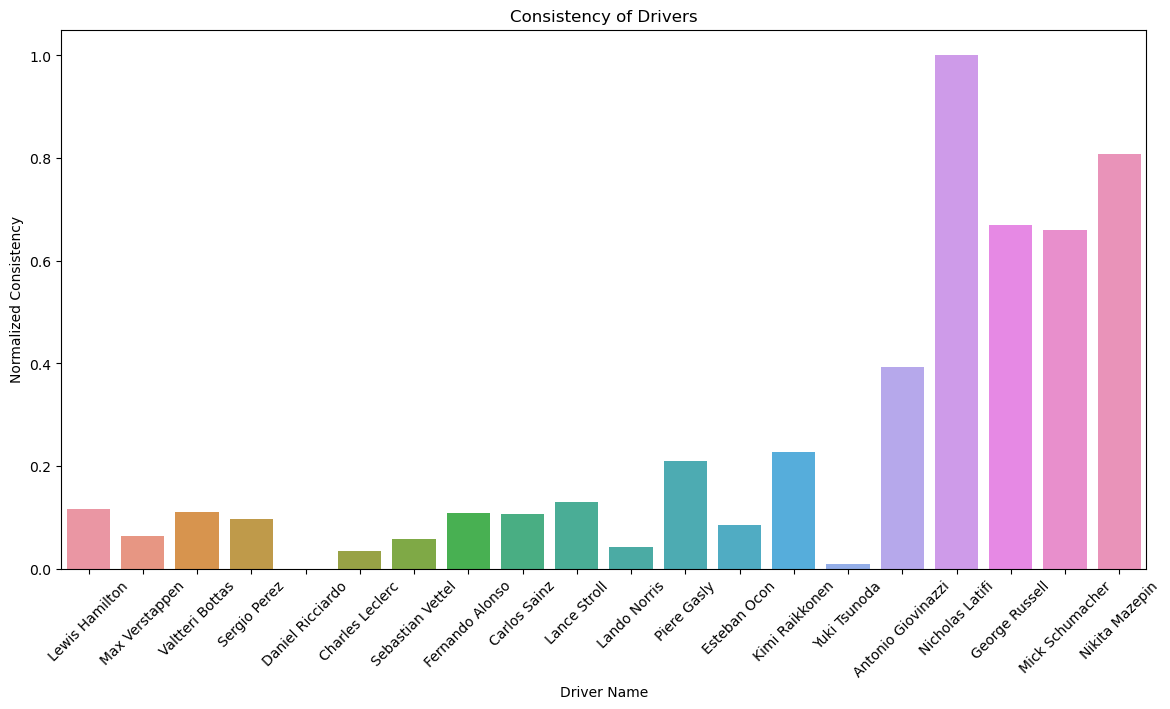

In [10]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Driver Name', y='Normalized Consistency', data=data)
plt.title('Consistency of Drivers')
plt.xlabel('Driver Name')
plt.ylabel('Normalized Consistency')
plt.xticks(rotation=45)
plt.show()

# Summary

Data Cleaning: Ensured there are no missing values in the dataset.

Descriptive Statistics: Calculated basic statistics to understand the dataset better.

Performance Metrics: Calculated average performance and consistency for each driver.

Visualization: Created bar plots to visualize average performance and consistency.